**Define Custom Perceptron**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class NANDPerceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0  # Step function

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = self.activation(linear_output)
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(x) for x in linear_output])




**Train Data**

In [3]:
# NAND gate data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([1, 1, 1, 0])  # NAND output

# Train and plot
perceptron = NANDPerceptron(learning_rate=0.1, epochs=100)
perceptron.fit(X, y)

print("NAND Gate:")
print("Weights:", perceptron.weights)
print("Bias:", perceptron.bias)

NAND Gate:
Weights: [-0.2 -0.1]
Bias: 0.2


**Plot Data**

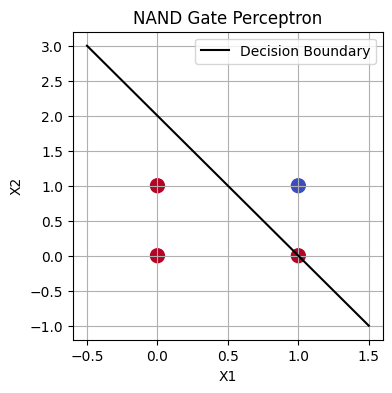

In [4]:

# Plotting
plt.figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm')
xx = np.linspace(-0.5, 1.5, 100)
yy = (-perceptron.weights[0] / perceptron.weights[1]) * xx - (perceptron.bias / perceptron.weights[1])
plt.plot(xx, yy, 'k-', label='Decision Boundary')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("NAND Gate Perceptron")
plt.legend()
plt.grid()
plt.show()